In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from collections import namedtuple
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset
import numpy.ma as ma

In [2]:
fileList = open('/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/file.txt', 'r')  # fileList is the name of the txt that contains the names of the .nc files
for i in fileList:
    print(i)

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/S5P_OFFL_L2__CH4____20190113T075832_20190113T094003_06483_01_010202_20190119T095348.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/S5P_OFFL_L2__CH4____20190114T073934_20190114T092104_06497_01_010202_20190120T091255.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/S5P_OFFL_L2__CH4____20190114T092104_20190114T110234_06498_01_010202_20190120T112916.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/S5P_OFFL_L2__CH4____20190127T083728_20190127T101859_06682_01_010202_20190202T101231.nc

/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/S5P_OFFL_L2__CH4____20190128T081831_20190128T100001_06696_01_010202_20190203T095540.nc



In [3]:
# function to filter ch4 where its qa_value is larger than some threashold
# this function change the mask to 'True' where the qa_value is smaller than the threashold

def filter_ch4_qa(file_ch4, qa_threashold=0.5):
    groups = file_ch4.groups['PRODUCT']
    qa_value = groups.variables['qa_value'][0]
    ch4 = groups.variables['methane_mixing_ratio'][0]
    ch4_mask = ma.masked_less(qa_value, qa_threashold).mask
    output_ch4 = ma.masked_array(ch4, mask=ch4_mask)
    return output_ch4

1602.2119 1951.4568


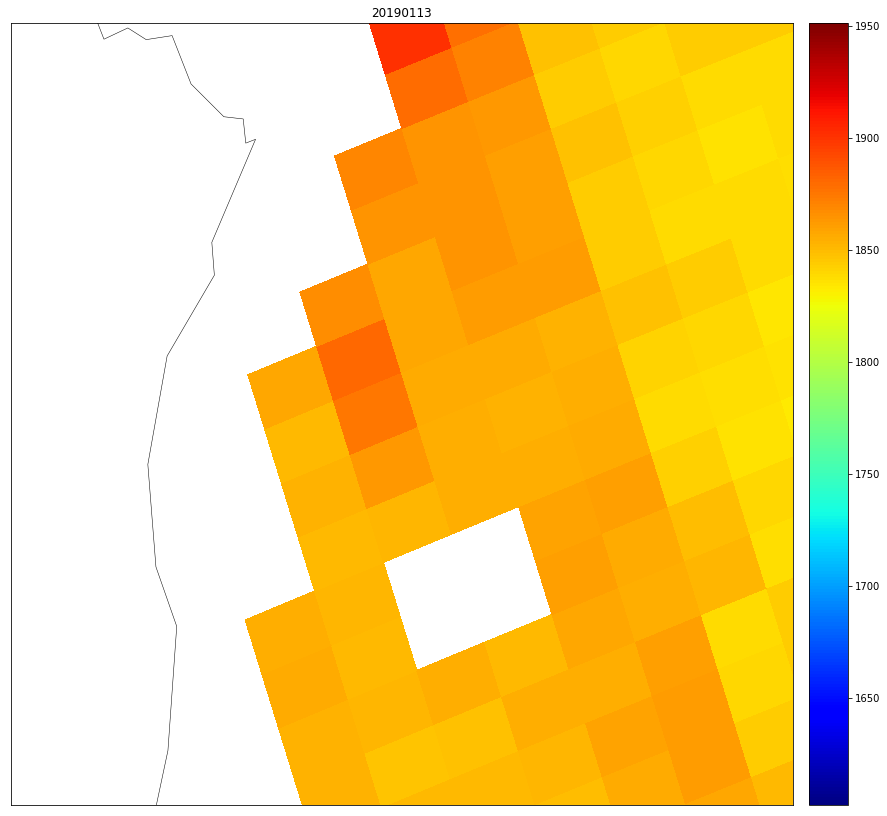

Figure saved.
1638.9167 1965.2334


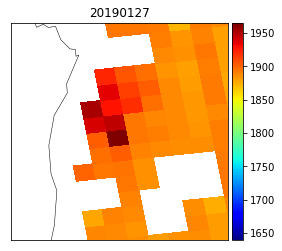

Figure saved.
Finished!


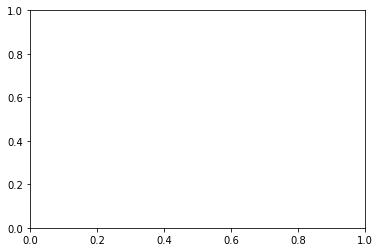

In [17]:
fileList = open('/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/Korpezhe oil_gas field/file.txt', 'r')  # fileList is the name of the txt that contains the names of the .nc files
# loops through all files listed in the text file
plt.figure(figsize = (15, 15))
for FILE_NAME in fileList:  # FILE_NAME will be the name of e
    FILE_NAME = FILE_NAME.strip()  # strip() removes remove all the leading and trailing spaces from a string
    file = Dataset(FILE_NAME, 'r')  # Dataset is a netCDF4 method used to open .nc files
    ds = file
    lat = ds.groups['PRODUCT'].variables['latitude'][0][:][:]  # Gets latitude array
    lon = ds.groups['PRODUCT'].variables['longitude'][0][:][:]  # Gets longitude array
#     data = ds.groups['PRODUCT'].variables['methane_mixing_ratio'][0]
    data = filter_ch4_qa(ds)  # data will be the array of pollutants concentrations
    print(np.min(data), np.max(data))
    
    m = Basemap(width=100000, height=100000, resolution='i', projection='stere', lat_ts=40, lat_0=38.6,
                lon_0=54.2)
    m.drawcoastlines(linewidth=0.5)
    m.drawstates()
    m.drawcountries()
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180, 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
    
    vmin1 = np.min(data)
    vmax1 = np.max(data)
    # draw CH4 on the map
    m.pcolor(lon, lat, data, latlon=True, vmin=vmin1, vmax=vmax1, cmap='jet')
    cb = m.colorbar()
    fig_title = FILE_NAME[-66:-58]
#     print(fig_title)
    plt.title(fig_title)
    
    fig = plt.gcf()
    # saves as a png 
    pngfile = '{0}.png'.format(FILE_NAME[:-3])
    fig.savefig(pngfile, dpi=750)
    # Show the plot window.
    plt.show()
    # close the file
    plt.clf()
    plt.cla()
    file.close()
    print('Figure saved.')
print('Finished!')

